In [1]:
#importing the Necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the data

df = pd.read_csv("/Users/vigneshwarank/Documents/portfolio projects/Superstore/train.csv")
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# checking the dimension of data
df.info()

In [3]:
# Checking for null values
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [4]:
df['Postal Code'].fillna(0,inplace=True)
df['Postal Code']=df['Postal Code'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int64  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [46]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [6]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [7]:
#now lets describe the data 
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


# Cleaning Data

In [8]:
#Check for duplicates
df.duplicated().sum()

0

In [9]:
#using a clear way to show there is no duplicates
if df.duplicated().sum() > 0:
    print("Duplicates are present")
else:
    print("No duplicates found ")

No duplicates found 


#### No Duplicates were found 

# Exploratory Data Analysis

## Customer Analysis & Customer Segmentation

In [10]:
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [11]:
#Types of customers
types_of_cust = df['Segment'].unique()
types_of_cust

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [12]:
# Number of customers in each segment

num_of_cust = df['Segment'].value_counts().reset_index()
num_of_cust = num_of_cust.rename(columns={'index':'Customer type','Segment':'Counts'})
num_of_cust

,Customer type,Counts
0,Consumer,5101
1,Corporate,2953
2,Home Office,1746


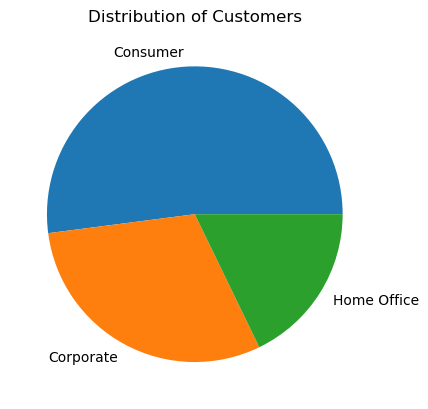

In [13]:
# Lets draw a pie chart for even more clear understanding

plt.pie(num_of_cust['Counts'],labels=num_of_cust['Customer type'])
plt.title("Distribution of Customers")
plt.show()

In [14]:
# Identifying sales by category
sales_by_category = df.groupby('Segment')['Sales'].sum().reset_index()
sales_by_category = sales_by_category.rename(columns={'Segment':'Customer Segment','Sales':'Total Sales'})
sales_by_category

,Customer Segment,Total Sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.249822e+05


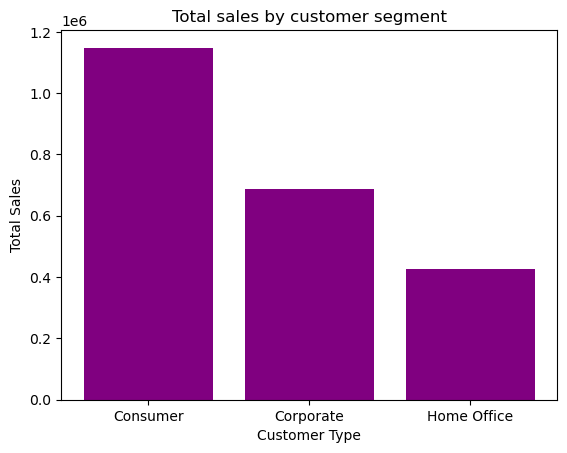

In [15]:
# Lets get a clear visual by using a bar plot 

plt.bar(sales_by_category['Customer Segment'],sales_by_category['Total Sales'],color='purple')
plt.title('Total sales by customer segment')
plt.xlabel('Customer Type')
plt.ylabel("Total Sales")
plt.show()


## Now lets have a look at Customer Loyalty

In [16]:
# Looking for the loyal customers by the frequency of the orders 

Customer_order_freq = df.groupby(['Customer ID','Customer Name','Segment'])['Order ID'].count().reset_index()
Customer_order_freq = Customer_order_freq.rename(columns=({'Order ID':'Total Numbers'}))
Customer_order_freq

,Customer ID,Customer Name,Segment,Total Numbers
0,AA-10315,Alex Avila,Consumer,11
1,AA-10375,Allen Armold,Consumer,15
2,AA-10480,Andrew Allen,Consumer,12
3,AA-10645,Anna Andreadi,Consumer,18
4,AB-10015,Aaron Bergman,Consumer,6
...,...,...,...,...
788,XP-21865,Xylona Preis,Consumer,28
789,YC-21895,Yoseph Carroll,Corporate,8
790,YS-21880,Yana Sorensen,Corporate,12
791,ZC-21910,Zuschuss Carroll,Consumer,31


In [17]:
#From this we will seperate the loyal customers who have purchased more than once 
loyal_cust_data=Customer_order_freq[Customer_order_freq['Total Numbers'] > 1]
loyal_cust_data

,Customer ID,Customer Name,Segment,Total Numbers
0,AA-10315,Alex Avila,Consumer,11
1,AA-10375,Allen Armold,Consumer,15
2,AA-10480,Andrew Allen,Consumer,12
3,AA-10645,Anna Andreadi,Consumer,18
4,AB-10015,Aaron Bergman,Consumer,6
...,...,...,...,...
788,XP-21865,Xylona Preis,Consumer,28
789,YC-21895,Yoseph Carroll,Corporate,8
790,YS-21880,Yana Sorensen,Corporate,12
791,ZC-21910,Zuschuss Carroll,Consumer,31


In [18]:
# Now to see the Loyal customer lets sort the data in descending order
loyal_cust = loyal_cust_data.sort_values('Total Numbers',ascending= False)
loyal_cust.head(10).reset_index()

,index,Customer ID,Customer Name,Segment,Total Numbers
0,787,WB-21850,William Brown,Consumer,35
1,606,PP-18955,Paul Prost,Home Office,34
2,482,MA-17560,Matt Abelman,Home Office,34
3,387,JL-15835,John Lee,Consumer,33
4,720,SV-20365,Seth Vernon,Consumer,32
5,349,JD-15895,Jonathan Doherty,Corporate,32
6,147,CK-12205,Chloris Kastensmidt,Consumer,32
7,44,AP-10915,Arthur Prichep,Consumer,31
8,275,EP-13915,Emily Phan,Consumer,31
9,791,ZC-21910,Zuschuss Carroll,Consumer,31


We can see that **William Brown** is the most loyal customer of all the customers

#### Lets's find Most revenue from a customer

In [19]:
## Most revenue generated customer
spender_data=df.groupby(['Customer Name','Segment','Customer ID'])['Sales'].sum().reset_index()
spender_data

,Customer Name,Segment,Customer ID,Sales
0,Aaron Bergman,Consumer,AB-10015,886.156
1,Aaron Hawkins,Corporate,AH-10030,1744.700
2,Aaron Smayling,Corporate,AS-10045,3050.692
3,Adam Bellavance,Home Office,AB-10060,7755.620
4,Adam Hart,Corporate,AH-10075,3250.337
...,...,...,...,...
788,Xylona Preis,Consumer,XP-21865,2374.658
789,Yana Sorensen,Corporate,YS-21880,6720.444
790,Yoseph Carroll,Corporate,YC-21895,5454.350
791,Zuschuss Carroll,Consumer,ZC-21910,8025.707


In [20]:
# rename the columns and find the highest spender
spender = spender_data.rename(columns=({'Sales':'Total Sales'}))
spender = spender.sort_values('Total Sales',ascending=False)
spender.head(10).reset_index()

,index,Customer Name,Segment,Customer ID,Total Sales
0,686,Sean Miller,Home Office,SM-20320,25043.050
1,730,Tamara Chand,Corporate,TC-20980,19052.218
2,622,Raymond Buch,Consumer,RB-19360,15117.339
3,757,Tom Ashbrook,Home Office,TA-21385,14595.620
4,6,Adrian Barton,Consumer,AB-10105,14473.571
5,441,Ken Lonsdale,Consumer,KL-16645,14175.229
6,671,Sanjit Chand,Consumer,SC-20095,14142.334
7,334,Hunter Lopez,Consumer,HL-15040,12873.298
8,672,Sanjit Engle,Consumer,SE-20110,12209.438
9,156,Christopher Conant,Consumer,CC-12370,12129.072


Clearly our Biggest Spender is **Sean Miller** with the total purchase of **25k**

# Shipping Analysis

In [21]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [22]:
print(df['Ship Mode'].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [23]:
# Now lets count in each category
shipping = df['Ship Mode'].value_counts().reset_index()
shipping = shipping.rename(columns=({'index':'Shipping Mode','Ship Mode':'Counts'}))
shipping

,Shipping Mode,Counts
0,Standard Class,5859
1,Second Class,1902
2,First Class,1501
3,Same Day,538


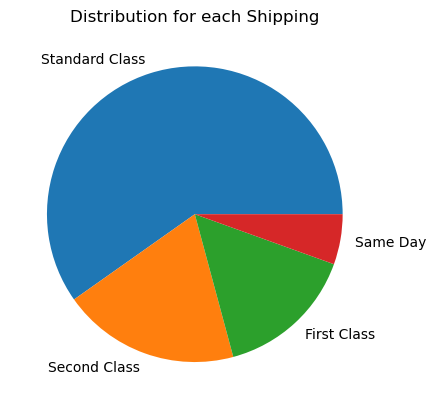

In [24]:
#Plotting a pie chart
plt.pie(shipping['Counts'],labels=shipping['Shipping Mode'])
plt.title('Distribution for each Shipping')
plt.show()

# Geographical Analysis

In [25]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


Lets focus the **State** column

In [26]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [27]:
states = df['State'].value_counts().reset_index()
states = states.rename(columns=({'index':'State','State':'Number of customers'}))
states

,State,Number of customers
0,California,1946
1,New York,1097
2,Texas,973
3,Pennsylvania,582
4,Washington,504
5,Illinois,483
6,Ohio,454
7,Florida,373
8,Michigan,253
9,North Carolina,247


In [28]:
#Now lets do for the cities 

Cities = df['City'].value_counts().reset_index()
Cities = Cities.rename(columns=({'index':'Cities','City':'Number of customers'}))
Cities

,Cities,Number of customers
0,New York City,891
1,Los Angeles,728
2,Philadelphia,532
3,San Francisco,500
4,Seattle,426
...,...,...
524,San Mateo,1
525,Cheyenne,1
526,Conway,1
527,Melbourne,1


In [29]:
#Now lets do for the countries 

countries  = df['Country'].value_counts().reset_index()
countries  = countries .rename(columns=({'index':'Country','Country':'Number of customers'}))
countries 

,Country,Number of customers
0,United States,9800


In [30]:
df['Country'].unique()

array(['United States'], dtype=object)

In [31]:
### Sales in according to the states
sales_state = df.groupby(['State'])['Sales'].sum().reset_index()
sales_state =sales_state.rename(columns=({'sales':'Total Sales'}))
sales_state = sales_state.sort_values('Sales',ascending=False)
sales_state.head(10).reset_index()

,index,State,Sales
0,3,California,446306.4635
1,30,New York,306361.1470
2,41,Texas,168572.5322
3,45,Washington,135206.8500
4,36,Pennsylvania,116276.6500
5,8,Florida,88436.5320
6,11,Illinois,79236.5170
7,20,Michigan,76136.0740
8,33,Ohio,75130.3500
9,44,Virginia,70636.7200


# Product Analysis

In [32]:
# Lets know the product categories
print(df['Category'].unique())

['Furniture' 'Office Supplies' 'Technology']


In [33]:
products_data = df['Category'].value_counts().reset_index()
products_data = products_data.rename(columns=({'index':'Category','Category':'Counts'}))
products_data

,Category,Counts
0,Office Supplies,5909
1,Furniture,2078
2,Technology,1813


**Office Supplies** has bee sold the most number of units

In [34]:
prod_sales = df.groupby(['Category'])['Sales'].sum().reset_index()
prod_sales = prod_sales.sort_values('Sales',ascending=False)
prod_sales

,Category,Sales
2,Technology,827455.8730
0,Furniture,728658.5757
1,Office Supplies,705422.3340


But the **Technology** Products has been generating the most of the revenue

In [35]:
# Lets dive into the sub - category to grt more insights

sub_cat = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()
sub_cat = sub_cat.sort_values('Sales',ascending=False)
sub_cat

,Sub-Category,Sales
13,Phones,327782.4480
5,Chairs,322822.7310
14,Storage,219343.3920
16,Tables,202810.6280
3,Binders,200028.7850
11,Machines,189238.6310
0,Accessories,164186.7000
6,Copiers,146248.0940
4,Bookcases,113813.1987
1,Appliances,104618.4030


The most selling product is **Phones**

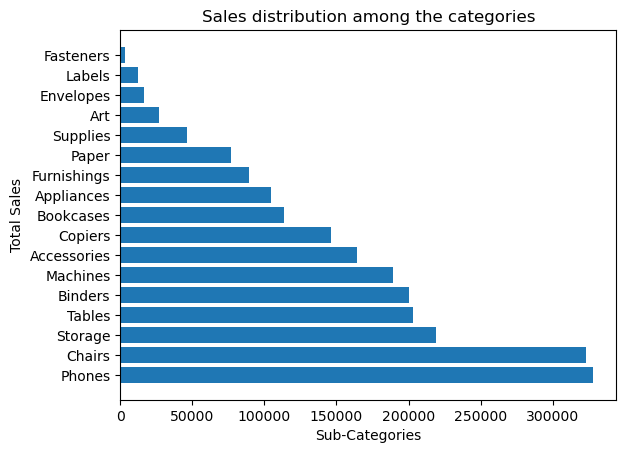

In [36]:
## plotting a bar graph

plt.barh(sub_cat['Sub-Category'],sub_cat['Sales'])
plt.title('Sales distribution among the categories')
plt.xlabel('Sub-Categories')
plt.ylabel('Total Sales')
plt.show()

# Time Analysis

In [37]:
# yearly sales
yearly = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()
yearly = yearly.rename(columns=({'Order Date':'Order Year','Sales':'Total Sales'}))
yearly

,Order Year,Total Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


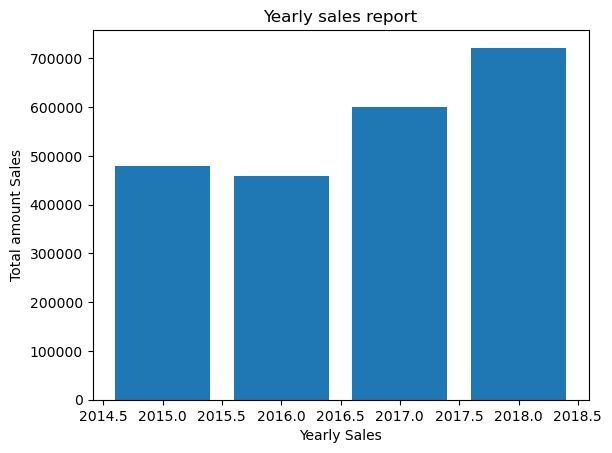

In [38]:
# Plotting a bar graph
plt.bar(yearly['Order Year'],yearly['Total Sales'])
plt.title('Yearly sales report')
plt.xlabel('Yearly Sales')
plt.ylabel('Total amount Sales')
plt.show()

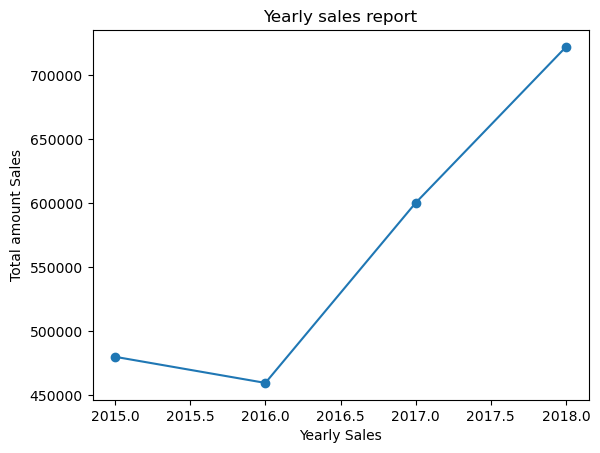

In [39]:
# Now lets take a look with a line chart

plt.plot(yearly['Order Year'],yearly['Total Sales'],marker='o',linestyle='-')
plt.title('Yearly sales report')
plt.xlabel('Yearly Sales')
plt.ylabel('Total amount Sales')
plt.show()

In [40]:
# Quaterly sales for 2018
Year_sales = df[df['Order Date'].dt.year == 2018]

quaterly = Year_sales.resample('Q' ,on='Order Date')['Sales'].sum().reset_index()
quaterly = quaterly.rename(columns=({'Order Date':'Quater','Sales':'Total Sales'}))

print(quaterly)



      Quater  Total Sales
0 2018-03-31  183444.5482
1 2018-06-30  125644.5095
2 2018-09-30  202504.9235
3 2018-12-31  210458.0380


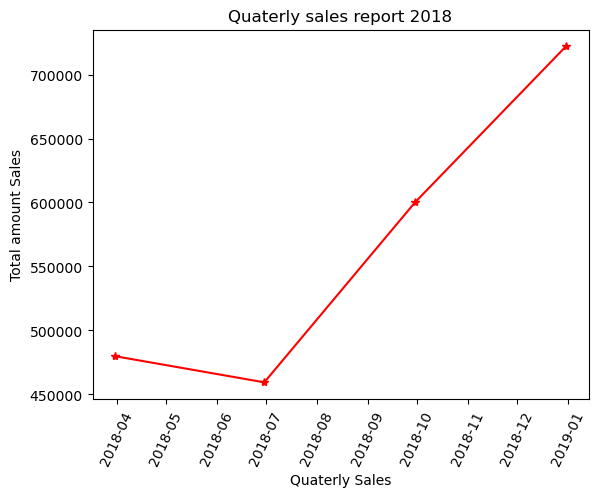

In [41]:
## lets draw a graph to visualize the quaterly sales

plt.plot(quaterly['Quater'],yearly['Total Sales'],marker='*',color='red')
plt.title('Quaterly sales report 2018')
plt.xlabel('Quaterly Sales')
plt.ylabel('Total amount Sales')
plt.xticks(rotation=65)
plt.show()

In [42]:
# Quaterly sales for 2018
Year_sales1 = df[df['Order Date'].dt.year == 2017]

quaterly1 = Year_sales1.resample('Q' ,on='Order Date')['Sales'].sum().reset_index()
quaterly1 = quaterly1.rename(columns=({'Order Date':'Quater','Sales':'Total Sales'}))

print(quaterly1)

      Quater  Total Sales
0 2017-03-31  135945.9150
1 2017-06-30  144628.9808
2 2017-09-30  128221.0637
3 2017-12-31  191396.5905


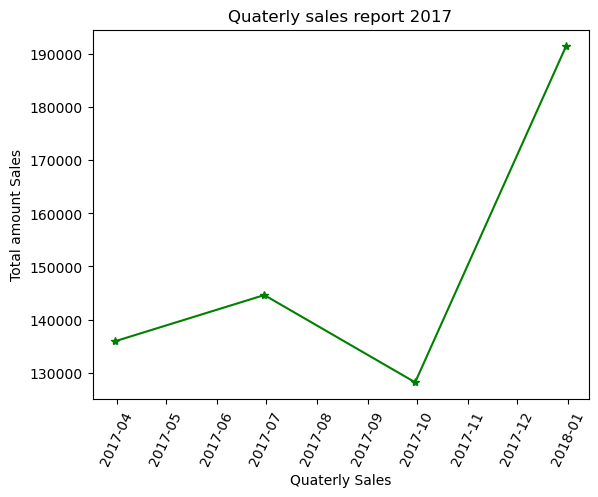

In [43]:
plt.plot(quaterly1['Quater'],quaterly1['Total Sales'],marker='*',color='green')
plt.title('Quaterly sales report 2017')
plt.xlabel('Quaterly Sales')
plt.ylabel('Total amount Sales')
plt.xticks(rotation=65)
plt.show()

In [44]:
# Monthly sales in 2018

monthly_sales = df[df['Order Date'].dt.year == 2018]
monthly = monthly_sales.resample('M',on='Order Date')['Sales'].sum().reset_index()
monthly = monthly.rename(columns=({'Order Date':'Month','Sales':'Total sales'}))
monthly

,Month,Total sales
0,2018-01-31,59767.0910
1,2018-02-28,48928.8334
2,2018-03-31,74748.6238
3,2018-04-30,37849.2156
4,2018-05-31,40882.4464
5,2018-06-30,46912.8475
6,2018-07-31,53942.7755
7,2018-08-31,75408.7840
8,2018-09-30,73153.3640
9,2018-10-31,65501.1622


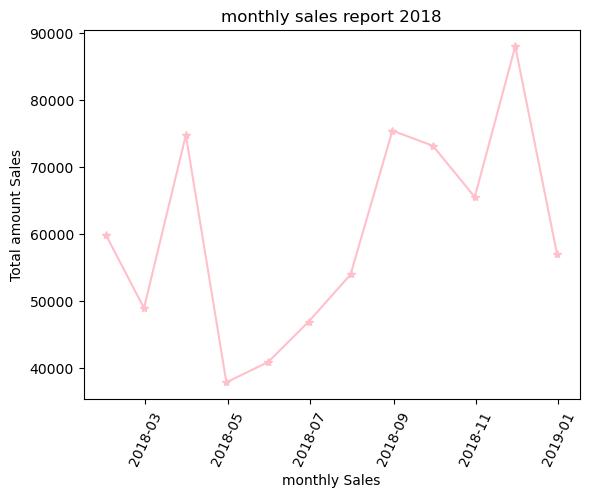

In [45]:
## Lets Visualize the montly trend by a line chart
plt.plot(monthly['Month'],monthly['Total sales'],marker='*',color='Pink')
plt.title('monthly sales report 2018')
plt.xlabel('monthly Sales')
plt.ylabel('Total amount Sales')
plt.xticks(rotation=65)
plt.show()